<a href="https://colab.research.google.com/github/Zmohameddd/Machine-Learning-Projects/blob/main/Brain_Tumor_MRI_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project
 **Zak Mohamed**

 **August 2024**
# Multi Image Classification using CNN
---




##**Brain Tumor MRI Classification**
* Glioma
* Meningioma
* Pituitary
* No tumor

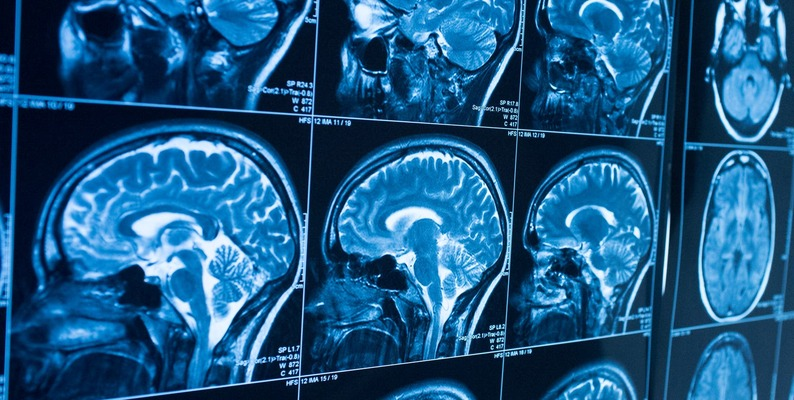

*   Kaggle Brain Tumor MRI Dataset
* https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data



# 1. Importing Necessary Libraries

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



# 2. Uploading the Dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Make sure the ~/.kaggle directory exists
!mkdir -p ~/.kaggle

# Copy the json kaggle to this directory
!cp /content/kaggle.json ~/.kaggle/kaggle.json

# Allocate the required permission for this file
!chmod 600 ~/.kaggle/kaggle.json

# Verify the presence of kaggle.json
!ls -la ~/.kaggle

#download the dataset
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

# Ensure the exact filename by listing the contents of /content
!ls /content

# Unzip the downloaded dataset with the correct filename
!mkdir -p ./brain_tumor_dataset
!unzip -o /content/brain-tumor-mri-dataset.zip -d ./brain_tumor_dataset


# 3. Dataset Paths

In [34]:
dataset_path = './brain_tumor_dataset'
train_dir = os.path.join(dataset_path, 'Training')
validation_dir = os.path.join(dataset_path, 'Testing')


# 4. Data Preprocessing

In [35]:
batch_size = 32
image_size = (128, 128)
num_classes = 4

# Training Data Generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Validation Data Generator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=image_size,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle = False)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# 5. Model Building

In [37]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes, activation='linear')
])

#model.compile(loss='categorical_crossentropy',
             # optimizer='adam',
              #metrics=['accuracy'])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = (['accuracy'])
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 6. Model Training

In [38]:
epochs = 40

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=epochs)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.4246 - loss: 1.1858 - val_accuracy: 0.4352 - val_loss: 1.9174
Epoch 2/40
  1/178 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7188 - loss: 0.7090

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 0.7090 - val_accuracy: 0.5161 - val_loss: 1.4572
Epoch 3/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 72s 214ms/step - accuracy: 0.6796 - loss: 0.8047 - val_accuracy: 0.4727 - val_loss: 1.5706
Epoch 4/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.6875 - loss: 0.7426 - val_accuracy: 0.3871 - val_loss: 2.2673
Epoch 5/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.7247 - loss: 0.6914 - val_accuracy: 0.4352 - val_loss: 1.9654
Epoch 6/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8438 - loss: 0.5148 - val_accuracy: 0.4194 - val_loss: 2.2878
Epoch 7/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.7468 - loss: 0.6179 - val_accuracy: 0.6148 - val_loss: 1.0091
Epoch 8/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.7188 - loss: 0.6200 - val_accuracy: 0.7097 - val_loss: 0.8345
Epoch 9/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 38s 182ms/step - accuracy: 0.7605 - loss: 0.6085 - val_accur

In [39]:
#For debugging
print("Number of predicted samples:", len(y_pred))
print("Number of actual samples:", len(val_generator.classes))

Number of predicted samples: 1311
Number of actual samples: 1311


# 7. Model Evaluation

In [40]:

# Evaluate performance on the validation set
#validation_steps = validation_generator.samples // batch_size
#val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_steps)
#print(f'Validation Loss: {val_loss}')
#print(f'Validation Accuracy: {val_accuracy}')

# Model evaluation setup with corrected code for sample consideration
import math

# Calculate validation steps (round up to ensure every sample is considered)
validation_steps = math.ceil(validation_generator.samples / batch_size)

# Evaluate performance on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


# Generate Classification Report and Confusion Matrix
val_generator = validation_generator
val_generator.reset()
Y_pred = model.predict(val_generator, steps=validation_steps, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print("Number of predicted samples:", len(y_pred))
print("Number of actual samples:", len(validation_generator.classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6599 - loss: 1.0578
Validation Loss: 0.6489835381507874
Validation Accuracy: 0.8009153604507446
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
Confusion Matrix
[[177  60   8  55]
 [  3 172  79  52]
 [  0   2 403   0]
 [  0   1   1 298]]
Classification Report
              precision    recall  f1-score   support

      glioma       0.98      0.59      0.74       300
  meningioma       0.73      0.56      0.64       306
     notumor       0.82      1.00      0.90       405
   pituitary       0.74      0.99      0.85       300

    accuracy                           0.80      1311
   macro avg       0.82      0.79      0.78      1311
weighted avg       0.82      0.80      0.79      1311

Number of predicted samples: 1311
Number of actual samples: 1311


# 8. Visualization

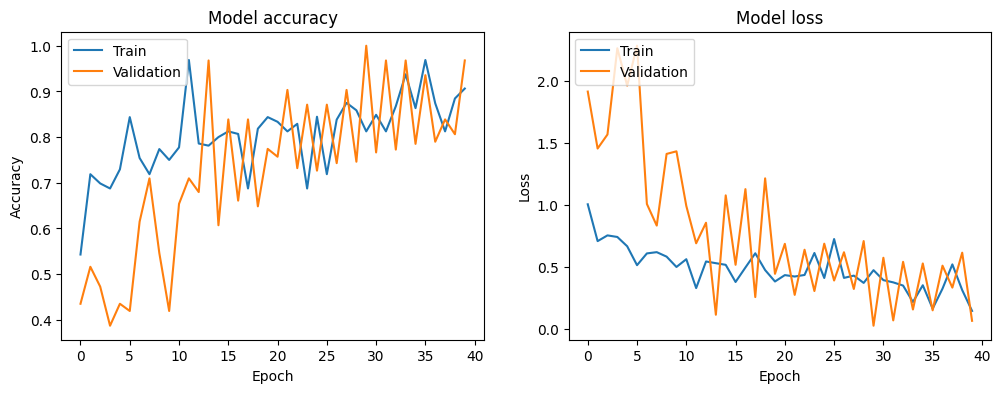

In [41]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
